# <center> Matplotlib Task</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hotel =pd.read_excel("../../Project Data/HotelCustomersDataset.xlsx")

In [5]:
hotel.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
hotel["date"] = (pd.to_datetime("2018-12-31") - 
                pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_16916\2875342170.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")


## Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [18]:
daily_revenue = (hotel.groupby("date").
                 agg({"LodgingRevenue":"sum","OtherRevenue":"sum"}))

In [27]:
daily_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39
...,...,...
2018-12-27,12226.74,3683.15
2018-12-28,13728.79,3512.40
2018-12-29,25279.16,7768.88


In [24]:
monthly_revenue =daily_revenue.resample("M").sum()

In [28]:
monthly_revenue.head(10)

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


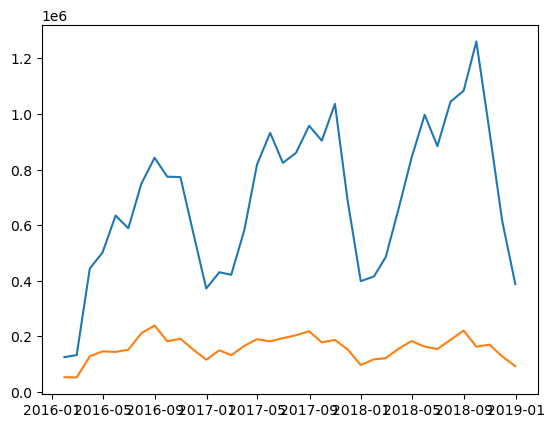

In [29]:
fig,ax=plt.subplots()
ax.plot(monthly_revenue)

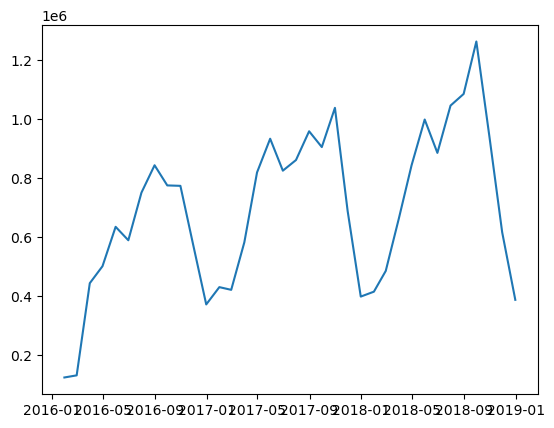

In [30]:
fig,ax= plt.subplots()
ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"])

In [31]:
yearly_revenue =daily_revenue.resample("Y").sum()

In [32]:
yearly_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-12-31,6509064.61,1759384.68
2017-12-31,8851572.88,2042128.73
2018-12-31,9616228.97,1848262.12


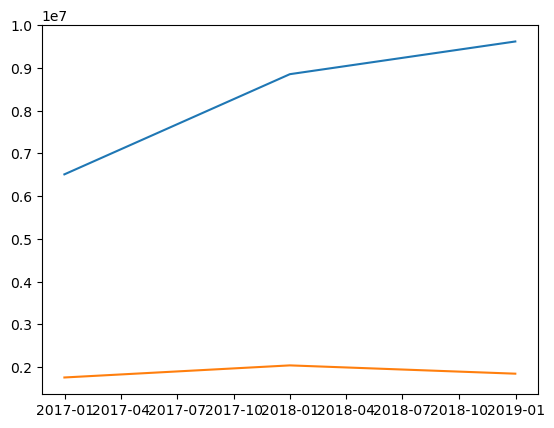

In [34]:
fig,ax = plt.subplots()

ax.plot(yearly_revenue)